In [1]:
import numpy
import keras
import os
import tensorflow as tf
import numpy as np
import time
import sys, os, glob, time, imageio 
import numpy as np, pandas as pd  
from numpy import asarray
from numpy import savez_compressed
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from IPython.display import HTML
from PIL import Image 
import torch 
import torchvision.utils as vutils 
import torchvision.transforms as transforms 
from keras import models, layers, optimizers 
from keras.models import Sequential 
from keras.preprocessing.image import array_to_img, img_to_array, load_img 
import tensorflow as tf
import cv2

Using TensorFlow backend.


In [2]:
np.load.__defaults__=(None, True, True, 'ASCII')
# data= np.load('all_image_data.npy')

In [3]:
# Time 
def _time(start, end): 
    # if in seconds 
    if (end-start)<60: 
        wall_time = f'{round((end-start),2)}sec'
    # if in minute(s)  
    elif (end-start)>=3600: 
        wall_time = f'{int((end-start)/3600)}h {int(((end-start)%3600)/60)}min {round((end-start)%60,2)}sec'
    # if in houre(s)  
    else: 
        wall_time = f'{int((end-start)/60)}min {round((end-start)%60,2)}sec'
    return wall_time 

In [4]:
start=time.time()

data = np.load('all_image_data.npy')[0]

end=time.time()
""

# print("\nData summary:\n", data)
print("\nData shape:\n", data.shape)
print(f"\nTime to read: {round(end-start,5)} seconds.")



Data shape:
 (1164, 2, 1)

Time to read: 1.28302 seconds.


(256, 256, 3)


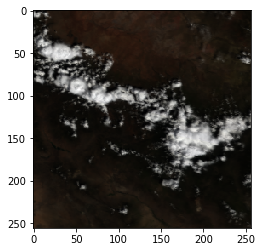

In [5]:
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
np_img = data[5][0][0]
print(np_img.shape)
#print(np_img)
plt.imshow(np_img)
plt.show()

In [6]:
IMG_HEIGHT,IMG_WIDTH = (128, 128)

In [7]:
def get_data(filename, dim=(IMG_HEIGHT,IMG_WIDTH), rand_shuffle=True):
   
    img_data_array = []
   
    for ii, file in enumerate(data):
       
        image = data[ii][0][0]
        image = image.astype('float32')
        image = cv2.resize(image, dsize=(128, 128), interpolation=cv2.INTER_AREA)
        image /= 128
        img_data_array.append(image)
            
    img_data_array = np.array(img_data_array)
    
            
    return img_data_array

In [8]:
# extract the image array and class name
img_data = get_data(data)

In [9]:
img_data.shape

(1164, 128, 128, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(128, 128, 3)
[[[0.765625   0.7597656  0.7578125 ]
  [0.3046875  0.29492188 0.30078125]
  [0.09765625 0.08789062 0.09375   ]
  ...
  [0.12890625 0.1015625  0.06054688]
  [0.13085938 0.10351562 0.0625    ]
  [0.140625   0.11328125 0.06835938]]

 [[1.1757812  1.1757812  1.1699219 ]
  [0.67578125 0.6796875  0.67578125]
  [0.6542969  0.6464844  0.6386719 ]
  ...
  [0.1015625  0.0859375  0.04882812]
  [0.09765625 0.08007812 0.046875  ]
  [0.1015625  0.08398438 0.046875  ]]

 [[1.40625    1.4082031  1.3984375 ]
  [1.2519531  1.2519531  1.2363281 ]
  [1.1953125  1.1894531  1.1757812 ]
  ...
  [0.10351562 0.0859375  0.046875  ]
  [0.09570312 0.08007812 0.04492188]
  [0.08984375 0.07421875 0.04101562]]

 ...

 [[0.43945312 0.30273438 0.19726562]
  [0.44140625 0.3046875  0.19921875]
  [0.421875   0.29882812 0.1953125 ]
  ...
  [0.13476562 0.1171875  0.08398438]
  [0.16015625 0.14648438 0.11914062]
  [0.1640625  0.14648438 0.11328125]]

 [[0.44921875 0.3125     0.20117188]
  [0.42578125 0.3007812

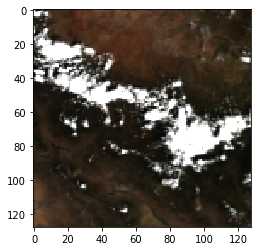

In [10]:
np_img = img_data[5]
print(np_img.shape)
print(np_img)
plt.imshow(np_img)
plt.show()

In [11]:
img_data.shape

(1164, 128, 128, 3)

In [12]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        #featurewise_center=True,
        #featurewise_std_normalization=True,
    #rotation_range=45,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
    #horizontal_flip=True,
    vertical_flip=True,
        #rescale=0.5,
    #zoom_range=0.5,
        #brightness_range=None,
    
#     samplewise_center=False,
#     zca_whitening=False,
#     zca_epsilon=1e-06,
#     brightness_range=None,
#     shear_range=0.0,
#     channel_shift_range=0.0,
#     fill_mode="nearest",
#     cval=0.0,
#     preprocessing_function=None,
#     data_format=None,
#     validation_split=0.0,
#     dtype=None,
)

In [13]:
"""
0 - Cloud
1 - Dust
2 - Haze
3 - Land
4 - Seaside
5 - Smoke
"""

'\n0 - Cloud\n1 - Dust\n2 - Haze\n3 - Land\n4 - Seaside\n5 - Smoke\n'

In [14]:
for _ in range(img_data.shape[0]):
    next(datagen.flow(img_data, save_to_dir = 'cloud_augmented_images/vertical_flip', batch_size=1))[0]
#plt.imshow(next(datagen.flow(img_data, save_to_dir = 'augmented_images', batch_size=1))[0]);